# Training code for Project 1 (i.e. Banana environment) in Udacity's Deep Reinforcement Learning nanodegree course

---

In this notebook, we will use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).



## 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import os
import sys
import random

import numpy as np
import torch
from collections import deque
import matplotlib.pyplot as plt

from unityagents import UnityEnvironment  # Used python3.6 so that 'pip install unityagents' works; python3.7 did not work.


from udacity.dqn_agent import Agent

/home/life/.pyenv/versions/3.6.11/envs/upy36/lib/python3.6/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:

print('python version:', os.path.dirname(sys.executable))

print('torch version:', torch.__version__)

python version: /home/life/.pyenv/versions/3.6.11/envs/upy36/bin
torch version: 1.7.0


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [4]:
# Update the following path to match your path to the Unity environment file:
file_name='/home/life/workspace_udacity/udacity_project1/Banana_Linux/Banana.x86_64'

env = UnityEnvironment(file_name=file_name)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

## 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


## 3. Test run an agent in the environment

Here, we will use a DQN agent and run it in the Banana environment without training it. This will ensure that the agent can communicate with the environment.

In [7]:

agent = Agent(state_size=state_size, action_size=action_size, seed=0)


env_info = env.reset(train_mode=True)[brain_name] # reset the environment; looks like if train_mode=True, I don't see the video running and each episode ends much faster.
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
step = 0
while True:
    #action = np.random.randint(action_size)        # select a random action
    action = agent.act(state)                      # Use the agent to get an action.
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    step += 1
    state = next_state                             # roll over the state to next time step
    print('\r(step, action,reward):', step, '\t', action, '\t', reward)
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

(step, action,reward): 1 	 1 	 0.0
(step, action,reward): 2 	 0 	 0.0
(step, action,reward): 3 	 1 	 0.0
(step, action,reward): 4 	 1 	 0.0
(step, action,reward): 5 	 0 	 0.0
(step, action,reward): 6 	 1 	 0.0
(step, action,reward): 7 	 1 	 0.0
(step, action,reward): 8 	 0 	 0.0
(step, action,reward): 9 	 1 	 0.0
(step, action,reward): 10 	 1 	 0.0
(step, action,reward): 11 	 0 	 0.0
(step, action,reward): 12 	 1 	 0.0
(step, action,reward): 13 	 1 	 0.0
(step, action,reward): 14 	 0 	 0.0
(step, action,reward): 15 	 1 	 0.0
(step, action,reward): 16 	 0 	 0.0
(step, action,reward): 17 	 1 	 0.0
(step, action,reward): 18 	 0 	 0.0
(step, action,reward): 19 	 1 	 0.0
(step, action,reward): 20 	 0 	 0.0
(step, action,reward): 21 	 1 	 0.0
(step, action,reward): 22 	 0 	 0.0
(step, action,reward): 23 	 1 	 0.0
(step, action,reward): 24 	 0 	 0.0
(step, action,reward): 25 	 1 	 0.0
(step, action,reward): 26 	 0 	 0.0
(step, action,reward): 27 	 1 	 0.0
(step, action,reward): 28 	 0 	 0.0
(

In [8]:
#env.close()

In [9]:

#assert False

## 4. Train an agent

In this section, we will train a DQN agent over many episodes.

In [10]:
def dqn(agent, n_episodes=2000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Trains an agent over multiple episodes using the Deep Q-Learning, and returns a list of final scores for the episodes ran.
    
    Parameters
    ----------
    agent
        A DQN agent to train
    n_episodes: int
        Maximum number of training episodes
    eps_start: float
        Starting value of epsilon, for epsilon-greedy action selection
    eps_end: float
        Minimum value of epsilon
    eps_decay :float
        Multiplicative factor (per episode) for decreasing epsilon
    
    Returns
    -------
    scores: list
        A list of final scores for the episodes ran.
        
    Notes
    -----
    The `dqn` function was taken from the Udacity nanodegree Deep Reinforcement Learning course, and modified.
    """
    
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]

        score = 0
        while True:
            action = agent.act(state, eps)
            
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
          
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            
    return scores

def dqn_test(agent, n_episodes=2000, eps=0.1):
    """Runs the trained agent in the environment for specified episodes and returns their scores.
    
    Parameters
    ----------
    agent
        Trained agent.
    n_episodes: int
        Number of episodes to run the agent in the environment.
    eps: float
        Epsilon, for epsilon-greedy action selection
        
    Returns
    -------
    scores: list
        A list of final scores for the episodes ran.
        
    """
    
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]

        score = 0
        while True:
            action = agent.act(state, eps)
            
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
         
            state = next_state
            score += reward
            if done:
                break 
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        
    return scores



In [11]:
# Train an agent:
agent = Agent(state_size=state_size, action_size=action_size, seed=0)

scores = dqn(agent, n_episodes=1000)


Episode 100	Average Score: 0.87
Episode 200	Average Score: 4.56
Episode 300	Average Score: 8.15
Episode 400	Average Score: 10.58
Episode 500	Average Score: 13.30
Episode 600	Average Score: 13.85
Episode 700	Average Score: 14.76
Episode 800	Average Score: 15.70
Episode 900	Average Score: 15.89
Episode 1000	Average Score: 15.75


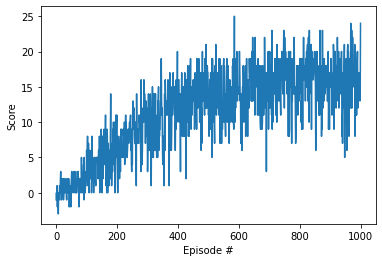

In [12]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## 5. Confirm that the saved weights contain the trained agent that performs better

In this section, we will load learned neural network weights from a file `checkpoint.pth` into an agent, and re-run agent without training, and evaluate its performance.

Note that an average score of 13+ for 100 consecutive episodes is considered "solving" the environment.

In [13]:
# Load the model weights from the previous Training step into a new agent:

agent2 = Agent(state_size=state_size, action_size=action_size, seed=0)
agent2.qnetwork_local.load_state_dict(torch.load('checkpoint.pth', map_location=torch.device('cpu')))
agent2.qnetwork_local.eval()

QNetwork(
  (fc1): Linear(in_features=37, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)

In [14]:
# Run the new agent for n_episodes:
scores_test = dqn_test(agent2, n_episodes=500, eps=0.1)


Episode 100	Average Score: 13.65
Episode 200	Average Score: 14.18
Episode 300	Average Score: 14.04
Episode 400	Average Score: 14.72
Episode 500	Average Score: 13.99


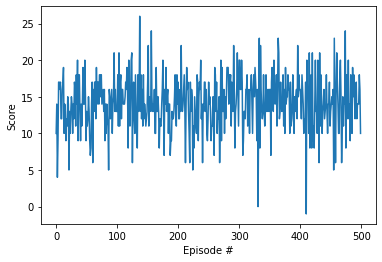

In [15]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores_test)), scores_test)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

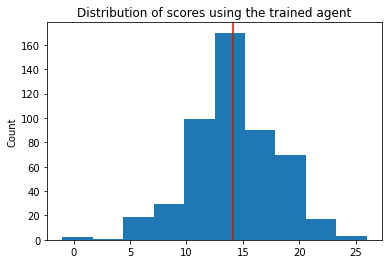

In [18]:
# Distribution of scores
score_mean = np.mean(scores_test)

plt.hist(scores_test, bins=10)
plt.ylabel('Count')
plt.title('Distribution of scores using the trained agent')
plt.axvline(x=score_mean, color='red')

In [17]:
print('Mean Score:', score_mean)

Mean Score: 14.108


In [19]:
# As you can see above, saved weights are indeed for an agent that can solve the Banana environment.